In [1]:
import math
import warnings
import csv
import json

import numpy as np
import pandas as pd
import scipy.stats as st

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go
import plotly.express as px

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 30)

In [2]:
def prettify(s):
    obj = json.loads(s)
    return json.dumps(obj, sort_keys=True, indent=4)


def prepare_trials(df):
    prefix = 'model__'
    renames = {x: x[len(prefix):] for x in filter(lambda c: c.startswith(prefix), df.columns)}
    df.rename(renames, axis=1, inplace=True)
    df.drop(['params'], axis=1, inplace=True)


def read_trials(filename):
    trials = pd.read_csv(filename)

    prepare_trials(trials)
    
    return trials

In [72]:
results = read_trials('temp/nn_trials_2019-10-07_09:21:48.csv')
results = results.reset_index(level=0)
results = results.rename(columns={"index": "iteration"})

print('trials: %s' % results.shape[0])

results.sort_values(by='val_acc', ascending=False).head(10)

trials: 57


,iteration,iteration,loss,train_acc,val_acc,elapsed_time_sec,learning_rate_10pow,reg_strength_10pow,learning_rate_decay,hidden_layer_size,batch_size,num_epochs
31,31,31,0.796006,0.915111,0.787,56.9,-1.190514,-2.882420,0.975580,78.0,61.0,98
3,3,3,1.047240,0.856889,0.785,55.6,-1.790282,-2.665502,0.991872,65.0,50.0,92
36,36,36,0.509829,0.946444,0.785,55.5,-1.159830,-3.298770,0.952678,89.0,83.0,54
30,30,30,0.470867,0.970333,0.780,67.6,-1.279789,-3.322101,0.975410,77.0,59.0,92
23,23,23,0.468733,0.951444,0.780,108.4,-1.903466,-3.477495,0.999943,127.0,50.0,67
39,39,39,0.396429,0.937333,0.778,58.1,-0.882655,-3.777409,0.922624,91.0,85.0,28
34,34,34,0.797915,0.899889,0.776,46.5,-1.451152,-2.878444,0.962096,64.0,63.0,87
24,24,24,0.242156,0.985556,0.776,116.6,-1.955518,-3.903575,0.999705,128.0,53.0,95
28,28,28,1.031022,0.831000,0.775,31.9,-1.867174,-2.675687,0.980693,42.0,74.0,99
16,16,16,1.206673,0.811667,0.775,108.7,-1.418476,-2.452504,0.912470,117.0,44.0,45


In [73]:
results = read_trials('temp/nn_trials_2019-10-07_10:22:11.csv')
results = results.reset_index(level=0)
results = results.rename(columns={"index": "iteration"})

print('trials: %s' % results.shape[0])

results.sort_values(by='val_acc', ascending=False).head(10)

trials: 63


,iteration,iteration,loss,train_acc,val_acc,elapsed_time_sec,learning_rate_10pow,reg_strength_10pow,learning_rate_decay,hidden_layer_size,batch_size,num_epochs
26,26,26,0.328128,0.987667,0.814,124.9,-1.099643,-3.570692,0.964509,81.0,53.0,98
33,33,33,0.412204,0.989111,0.808,207.5,-1.380468,-3.323433,0.977606,122.0,52.0,182
51,51,51,0.505744,0.975333,0.804,87.8,-1.025776,-3.202145,0.979332,76.0,104.0,176
47,47,47,0.833110,0.904444,0.802,150.7,-1.170796,-2.825235,0.939357,122.0,71.0,53
32,32,32,0.416976,0.990889,0.800,207.5,-1.380225,-3.313653,0.978671,117.0,51.0,166
40,40,40,0.582075,0.959556,0.796,80.0,-1.176407,-3.110630,0.975014,73.0,101.0,150
61,61,61,0.301689,0.991667,0.796,135.3,-1.147349,-3.623215,0.975209,70.0,50.0,125
54,54,54,0.736815,0.920556,0.795,95.4,-1.502194,-2.986730,0.991646,64.0,59.0,151
8,8,8,0.527783,0.975000,0.795,173.0,-1.505300,-3.184895,0.988001,112.0,63.0,147
27,27,27,0.336644,0.989778,0.794,132.2,-1.112321,-3.538889,0.966309,83.0,53.0,102


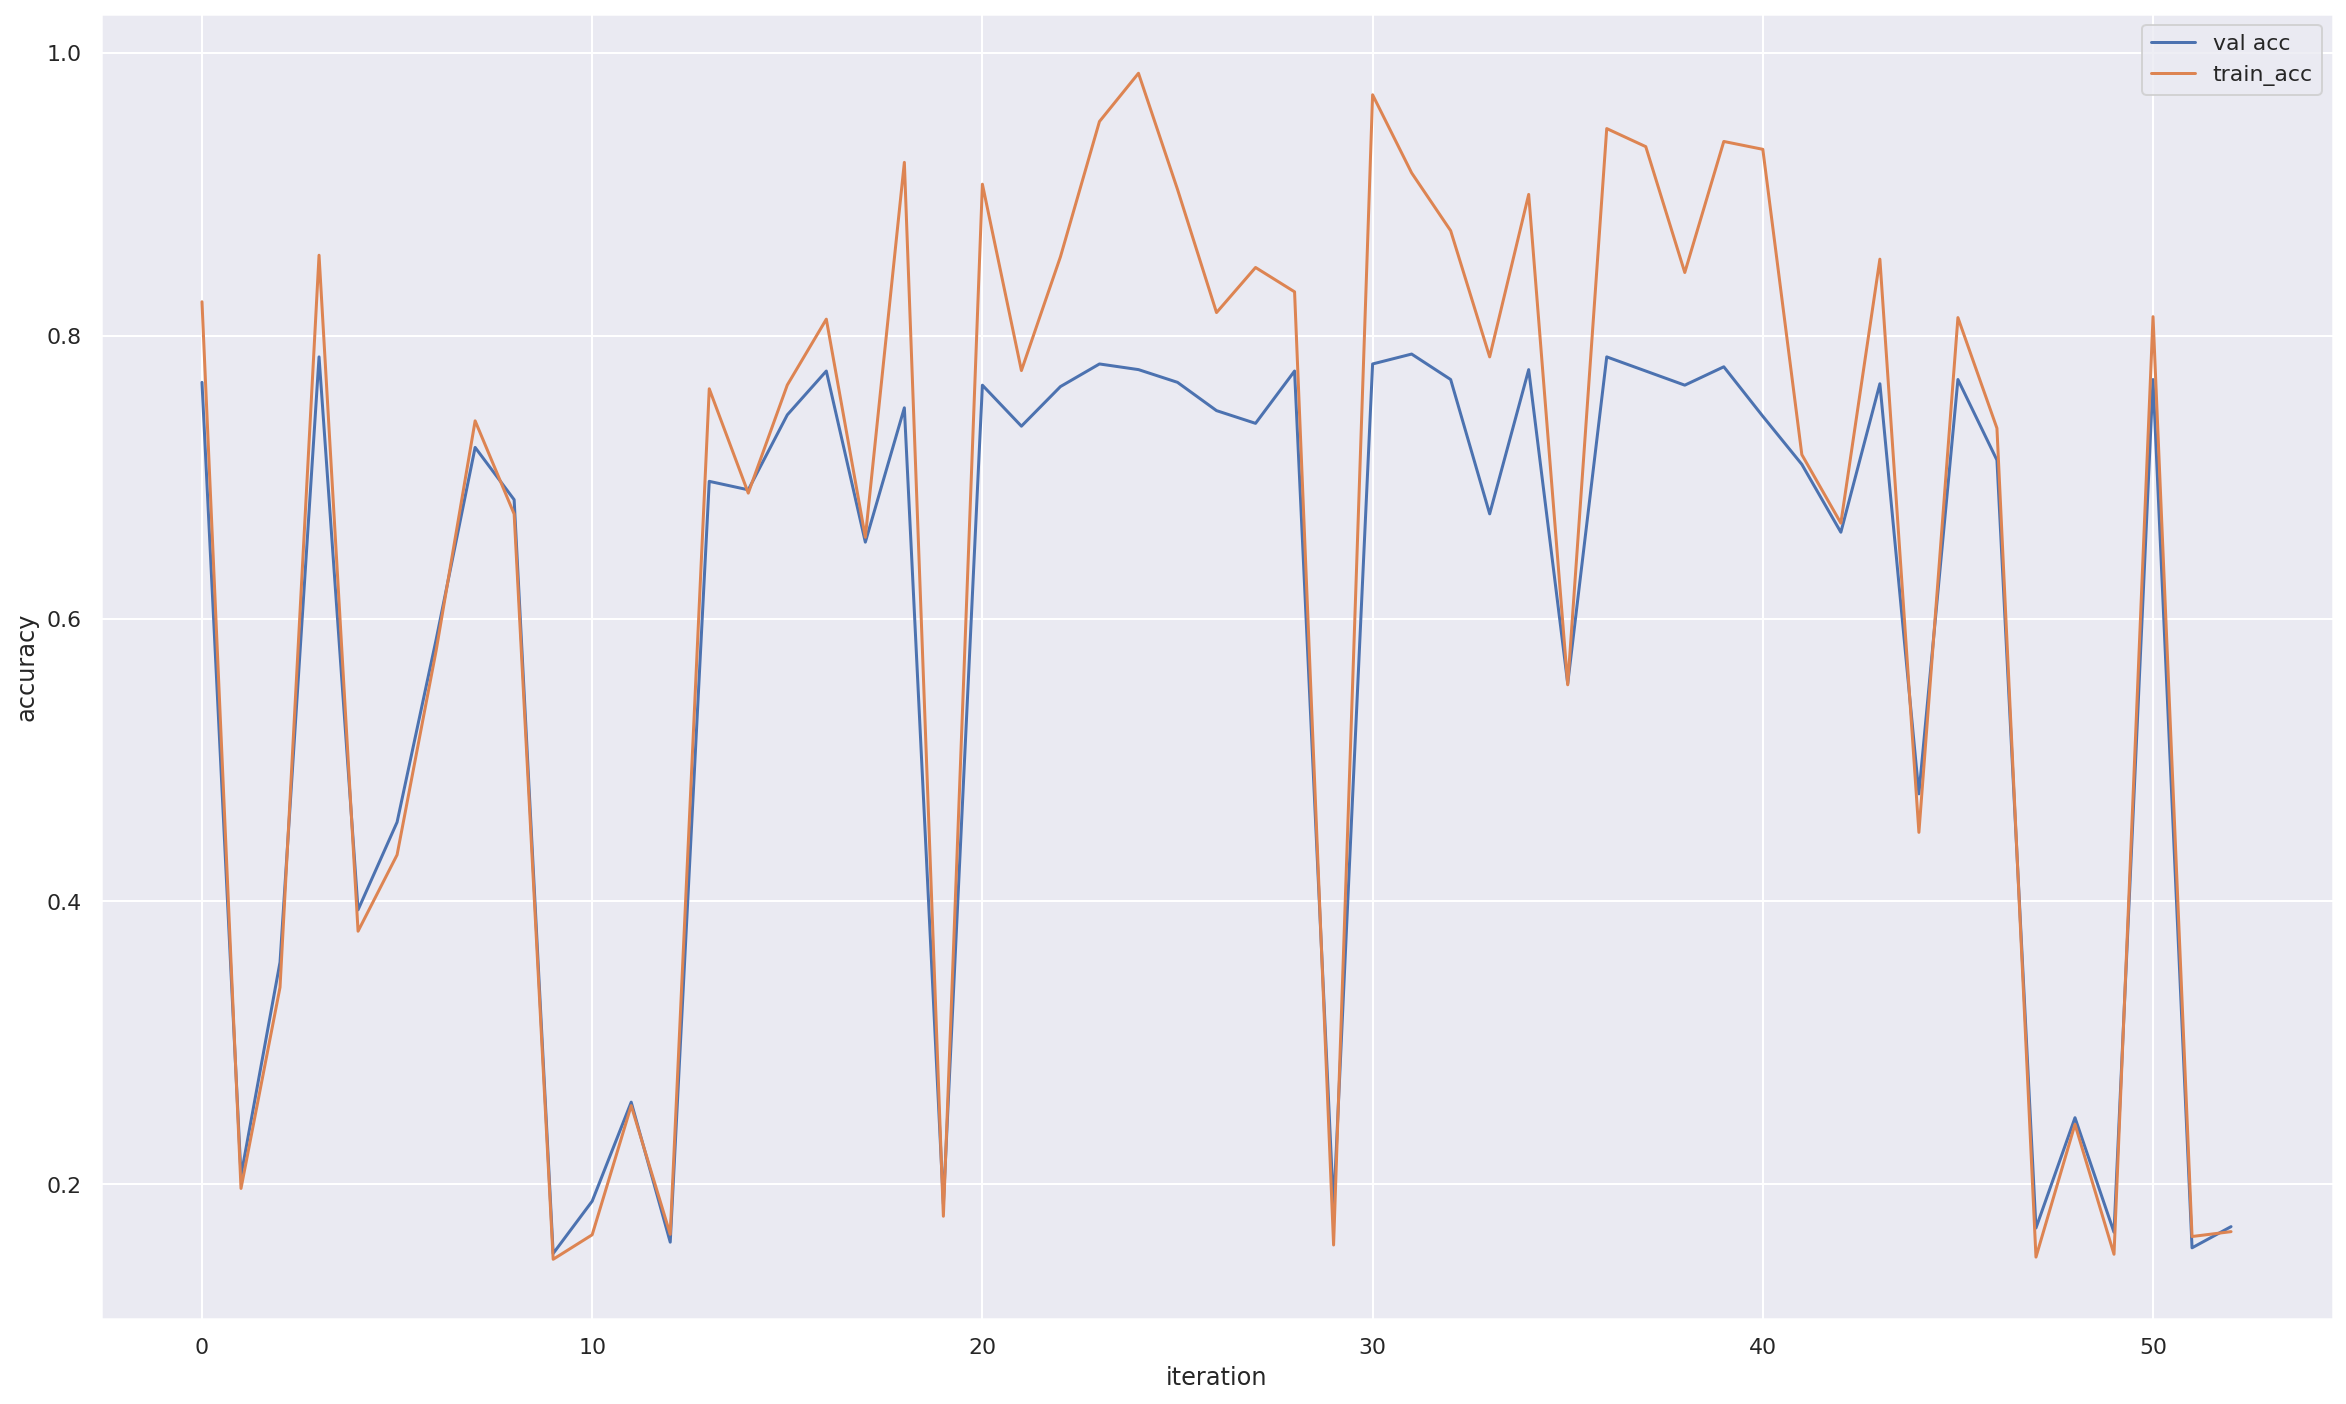

In [48]:
results_plt = results #[results['val_acc'] > 0.5]


plt.figure(figsize=(20, 12))
plt.plot(results_plt.index, results_plt['val_acc'], '-', label='val acc')
plt.plot(results_plt.index, results_plt['train_acc'], '-', label='train_acc')

plt.xlabel('iteration')
plt.ylabel('accuracy')

plt.legend()
plt.grid(True);